In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/44 [..............................] - ETA: 8s - loss: 1.8990 - accuracy: 0.2344
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 4ms/step - loss: 1.8366 - accuracy: 0.2495 - val_loss: 1.7503 - val_accuracy: 0.3576
Epoch 2/1000
 1/44 [..............................] - ETA: 0s - loss: 1.7641 - accuracy: 0.3047
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.7422 - accuracy: 0.3103 - val_loss: 1.6425 - val_accuracy: 0.3860
Epoch 3/1000
 1/44 [..............................] - ETA: 0s - loss: 1.7450 - accuracy: 0.3359
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.6881 - accuracy: 0.3446 - val_loss: 1.5682 - val_accuracy: 0.4197
Epoch 4/1000
 1/44 [..............................] - ETA: 0s - loss: 1.7022 - accuracy: 0.2891
E

 1/44 [..............................] - ETA: 0s - loss: 1.1628 - accuracy: 0.5703
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.2126 - accuracy: 0.5677 - val_loss: 0.8673 - val_accuracy: 0.7714
Epoch 29/1000
 1/44 [..............................] - ETA: 0s - loss: 1.2718 - accuracy: 0.5469
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.2025 - accuracy: 0.5681 - val_loss: 0.8546 - val_accuracy: 0.7708
Epoch 30/1000
 1/44 [..............................] - ETA: 0s - loss: 1.2328 - accuracy: 0.5078
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.5770 - val_loss: 0.8411 - val_accuracy: 0.7757
Epoch 31/1000
 1/44 [..............................] - ETA: 0s - loss: 1.1649 - accuracy: 0.5625
Epoch 31

 1/44 [..............................] - ETA: 0s - loss: 1.1984 - accuracy: 0.5625
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.1118 - accuracy: 0.6098 - val_loss: 0.7369 - val_accuracy: 0.8002
Epoch 56/1000
 1/44 [..............................] - ETA: 0s - loss: 1.1383 - accuracy: 0.5859
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.6140 - val_loss: 0.7258 - val_accuracy: 0.8089
Epoch 57/1000
 1/44 [..............................] - ETA: 0s - loss: 0.9495 - accuracy: 0.6719
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.6120 - val_loss: 0.7284 - val_accuracy: 0.7986
Epoch 58/1000
 1/44 [..............................] - ETA: 0s - loss: 1.0842 - accuracy: 0.5859
Epoch 58

 1/44 [..............................] - ETA: 0s - loss: 0.9143 - accuracy: 0.6797
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0681 - accuracy: 0.6256 - val_loss: 0.6840 - val_accuracy: 0.8416
Epoch 83/1000
 1/44 [..............................] - ETA: 0s - loss: 0.9556 - accuracy: 0.6484
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0759 - accuracy: 0.6240 - val_loss: 0.6913 - val_accuracy: 0.8383
Epoch 84/1000
 1/44 [..............................] - ETA: 0s - loss: 0.9873 - accuracy: 0.6641
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0571 - accuracy: 0.6294 - val_loss: 0.6811 - val_accuracy: 0.8242
Epoch 85/1000
 1/44 [..............................] - ETA: 0s - loss: 1.0316 - accuracy: 0.6719
Epoch 85

 1/44 [..............................] - ETA: 0s - loss: 0.9152 - accuracy: 0.6719
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0402 - accuracy: 0.6394 - val_loss: 0.6508 - val_accuracy: 0.8541
Epoch 110/1000
 1/44 [..............................] - ETA: 0s - loss: 1.0163 - accuracy: 0.6172
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0502 - accuracy: 0.6309 - val_loss: 0.6490 - val_accuracy: 0.8547
Epoch 111/1000
 1/44 [..............................] - ETA: 0s - loss: 1.1083 - accuracy: 0.6641
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.6421 - val_loss: 0.6443 - val_accuracy: 0.8579
Epoch 112/1000
 1/44 [..............................] - ETA: 0s - loss: 0.9587 - accuracy: 0.6562
Ep

Epoch 136/1000
 1/44 [..............................] - ETA: 0s - loss: 1.1076 - accuracy: 0.6172
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0417 - accuracy: 0.6325 - val_loss: 0.6460 - val_accuracy: 0.8514
Epoch 137/1000
 1/44 [..............................] - ETA: 0s - loss: 0.8497 - accuracy: 0.6953
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0349 - accuracy: 0.6363 - val_loss: 0.6371 - val_accuracy: 0.8508
Epoch 138/1000
 1/44 [..............................] - ETA: 0s - loss: 0.9980 - accuracy: 0.6562
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
44/44 [==============================] - 0s 2ms/step - loss: 1.0291 - accuracy: 0.6407 - val_loss: 0.6417 - val_accuracy: 0.8552
Epoch 139/1000
 1/44 [..............................] - ETA: 0s - loss: 1.0734 - accu

Epoch 162: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 698us/step - loss: 0.6295 - accuracy: 0.8519


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[0.05670045 0.02626275 0.37240657 0.09948172 0.01633694 0.02977249
 0.39903915]
6


# Confusion matrix

58/58 [==============================] - 0s 546us/step


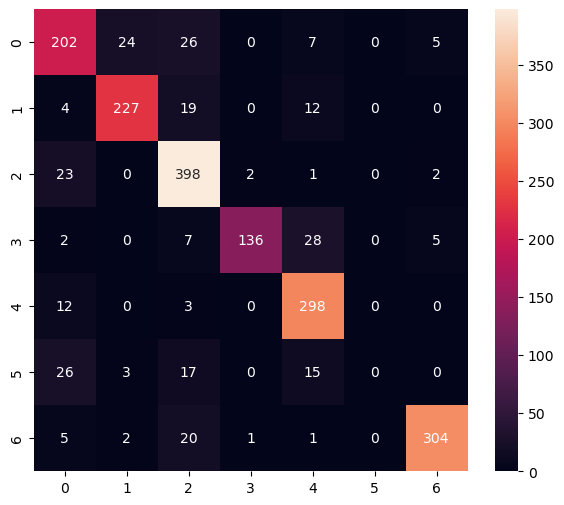

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       264
           1       0.89      0.87      0.88       262
           2       0.81      0.93      0.87       426
           3       0.98      0.76      0.86       178
           4       0.82      0.95      0.88       313
           5       0.00      0.00      0.00        61
           6       0.96      0.91      0.94       333

    accuracy                           0.85      1837
   macro avg       0.74      0.74      0.74      1837
weighted avg       0.83      0.85      0.84      1837



C:\Users\just1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\just1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\just1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\just1\AppData\Local\Temp\tmp560klgcs\assets


6676

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.05670046 0.02626275 0.3724065  0.09948169 0.01633694 0.02977248
 0.3990391 ]
6
